In [1]:
# !pip install transformers

# ! pip install torch
# ! pip install scikit-image


import torch
from torch import nn
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import requests
import os
import glob
from skimage import color
import pickle
import csv
import cv2 as cv
import math
import pandas as pd
os.chdir('/home/ubuntu/CategoricalvContinuous/CategoricalvContinuous')
# os.chdir('/home/ubuntu/CategoricalvContinuous/multidimensional_skin_analysis')

/home/ubuntu/.pyenv/versions/3.12.4/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:


#Original
original = "data/original/original_val_train"
#Filters
baby_cute_face="data/filters/baby_cute_face_combined"
baby_girl="data/filters/babygirl_combined"
big_city_life="data/filters/big_city_life_combined"
blochi_gora="data/filters/blochigora_combined"
caramel_macchiato="data/filters/caramel_macchiato_combined"
cute_baby_face="data/filters/cute_baby_face_combined"
pretty="data/filters/pretty_combined"
shiny_foxy = "data/filters/shiny_foxy_combined"
snatched = "data/filters/snatched_combined"





In [3]:
# Get images from original directory
original_images = glob.glob(os.path.join(original, "*.jpg"))
original_basenames = set(os.path.basename(img) for img in original_images)

print(f'There are {len(original_images)} images in the original data.')
print(f'Original basenames: {len(original_basenames)}')

# Get images from all filter directories
baby_cute_face_images = glob.glob(os.path.join(baby_cute_face, "*.jpg"))
baby_girl_images = glob.glob(os.path.join(baby_girl, "*.jpg"))
big_city_life_images = glob.glob(os.path.join(big_city_life, "*.jpg"))
blochi_gora_images = glob.glob(os.path.join(blochi_gora, "*.jpg"))
caramel_macchiato_images = glob.glob(os.path.join(caramel_macchiato, "*.jpg"))
cute_baby_face_images = glob.glob(os.path.join(cute_baby_face, "*.jpg"))
pretty_images = glob.glob(os.path.join(pretty, "*.jpg"))
shiny_foxy_images = glob.glob(os.path.join(shiny_foxy, "*.jpg"))
snatched_images = glob.glob(os.path.join(snatched, "*.jpg"))

# Get basenames for each filter
baby_cute_face_basenames = set(os.path.basename(img) for img in baby_cute_face_images)
baby_girl_basenames = set(os.path.basename(img) for img in baby_girl_images)
big_city_life_basenames = set(os.path.basename(img) for img in big_city_life_images)
blochi_gora_basenames = set(os.path.basename(img) for img in blochi_gora_images)
caramel_macchiato_basenames = set(os.path.basename(img) for img in caramel_macchiato_images)
cute_baby_face_basenames = set(os.path.basename(img) for img in cute_baby_face_images)
pretty_basenames = set(os.path.basename(img) for img in pretty_images)
shiny_foxy_basenames = set(os.path.basename(img) for img in shiny_foxy_images)
snatched_basenames = set(os.path.basename(img) for img in snatched_images)

# Print counts for each filter
print(f'Baby cute face: {len(baby_cute_face_basenames)}')
print(f'Baby girl: {len(baby_girl_basenames)}')
print(f'Big city life: {len(big_city_life_basenames)}')
print(f'Blochi gora: {len(blochi_gora_basenames)}')
print(f'Caramel macchiato: {len(caramel_macchiato_basenames)}')
print(f'Cute baby face: {len(cute_baby_face_basenames)}')
print(f'Pretty: {len(pretty_basenames)}')
print(f'Shiny foxy: {len(shiny_foxy_basenames)}')
print(f'Snatched: {len(snatched_basenames)}')

# Find common images across ALL directories (original + all filters)
common_images = original_basenames.intersection(
    baby_cute_face_basenames,
    baby_girl_basenames,
    big_city_life_basenames,
    blochi_gora_basenames,
    caramel_macchiato_basenames,
    cute_baby_face_basenames,
    pretty_basenames,
    shiny_foxy_basenames,
    snatched_basenames
)

print(f'\nCommon images across all directories: {len(common_images)}')

# If you want common images just between filters (excluding original)
common_filter_images = baby_cute_face_basenames.intersection(
    baby_girl_basenames,
    big_city_life_basenames,
    blochi_gora_basenames,
    caramel_macchiato_basenames,
    cute_baby_face_basenames,
    pretty_basenames,
    shiny_foxy_basenames,
    snatched_basenames
)

print(f'Common images across all filters (no original): {len(common_filter_images)}')

There are 12644 images in the original data.
Original basenames: 12644
Baby cute face: 12647
Baby girl: 12647
Big city life: 12647
Blochi gora: 12647
Caramel macchiato: 12647
Cute baby face: 12647
Pretty: 12647
Shiny foxy: 12647
Snatched: 12647

Common images across all directories: 12643
Common images across all filters (no original): 12646


In [4]:
import os
import pickle

def save_to_pkl(filename, save_directory):
    # Ensure the directory exists
    os.makedirs(save_directory, exist_ok=True)

    # Save common images to a pkl file in the specified directory
    with open(os.path.join(save_directory, 'common_images.pkl'), 'wb') as f:
        pickle.dump(filename, f)

# Save the common images to a pickle file if needed
if len(common_images) > 0:
    save_directory = 'data/common_images'
    save_to_pkl(common_images, save_directory)
    print(f"Saved {len(common_images)} common images to {save_directory}/common_images.pkl")
else:
    print("No common images found to save")

Saved 12643 common images to data/common_images/common_images.pkl


In [5]:
# # Only use color images
# def is_greyscale(img_path):
#     img = Image.open(img_path).convert('RGB')
#     np_img = np.array(img)
#     return np.all(np_img[..., 0] == np_img[..., 1]) and np.all(np_img[..., 0] == np_img[..., 2])


# full_paths = [os.path.join(original, img) for img in random_images]

# rgb_images = [img for img in full_paths if not is_greyscale(img)]

# print(f'There are {len(rgb_images)} color images in the directory.')

In [6]:
#Function to display original and filtered images side by side
def display_images(data, original, filtered):
    for img_name in data:
        # Construct the full path to the original and filtered image
        original_img_path = os.path.join(original, img_name)
        filter_img_path = os.path.join(filtered, img_name)

        # Read the images
        original_img = mpimg.imread(original_img_path)
        print(original_img_path)
        filter_img = mpimg.imread(filter_img_path)
        #Flip the filtered images
        # filter_img = np.fliplr(filter_img)

        print(filter_img_path)


        plt.figure()

        # Display the original image
        plt.subplot(1, 2, 1)
        plt.imshow(original_img)
        plt.axis('off')  # to hide the axis
        plt.title('Original')

        # Display the filtered image
        plt.subplot(1, 2, 2)
        plt.imshow(filter_img)
        plt.axis('off')  # to hide the axis
        plt.title('Filtered')

        plt.show()

In [7]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import numpy as np

# # Get just the base names of the images without directory path
# image_names = [os.path.basename(img) for img in common_images]

# # Pass these to the display_images function
# display_images(image_names, original, filtered)




In [8]:
# import skin segmentation model
image_processor = SegformerImageProcessor.from_pretrained("jonathandinu/face-parsing")
model = SegformerForSemanticSegmentation.from_pretrained("jonathandinu/face-parsing")

In [9]:
#This function processes the image, runs it through the model to get predictions,
# and then extracts and visualizes the skin regions from the image. 
def run_inference(image, image_processor, model):
    # Run inference on the image
    
    # Process the image using the image_processor to get the inputs in the required format (PyTorch tensors)
    inputs = image_processor(images=image, return_tensors="pt")
    
    # Pass the processed inputs through the model to get the outputs
    outputs = model(**inputs)
    
    # Extract the logits (raw predictions) from the model outputs
    logits = outputs.logits
    
    # Upsample the logits to match the original image size using bilinear interpolation
    upsampled_logits = nn.functional.interpolate(logits, size=image.size[::-1], mode='bilinear', align_corners=False)
    
    # Get the labels by finding the index of the maximum logit value along the channel dimension
    labels = upsampled_logits.argmax(dim=1)[0]
    
    # Convert the labels tensor to a NumPy array for further processing
    labels_viz = labels.cpu().numpy()

    # Extract the skin from the image by setting non-skin labels to 0
    labels_viz[labels_viz > 2] = 0  # Set labels greater than 2 to 0
    labels_viz[labels_viz == 0] = 0  # Ensure label 0 remains 0
    labels_viz[labels_viz == 1] = 1  # Set label 1 to 1 (indicating skin)

    # Return the processed labels visualization
    return labels_viz

In [10]:
def display_mask(random_images, test_original, test_filter, image_processor, model):
    for img_name in random_images:
        # Construct the full path to the original and filtered image
        original_img_path = os.path.join(test_original, img_name)
        filter_img_path = os.path.join(test_filter, img_name)

        # Read the images
        original_img = Image.open(original_img_path)
        filter_img = Image.open(filter_img_path)
        #Flip filtered image
        # filter_img = np.array(filter_img)
        # filter_img = np.fliplr(filter_img)
        # filter_img = Image.fromarray(filter_img)


        # Run inference on the original and filtered images
        labels_viz_original = run_inference(original_img, image_processor, model)
        labels_viz_filter = run_inference(filter_img, image_processor, model)


        plt.figure()

        # Display the skin from the original image
        plt.subplot(1, 2, 1)
        plt.imshow(labels_viz_original)
        plt.axis('off')  # to hide the axis
        plt.title('Original')

        # Display the skin from the filtered image
        plt.subplot(1, 2, 2)
        plt.imshow(labels_viz_filter)
        plt.axis('off')  # to hide the axis
        plt.title('Filtered')

        plt.show()





In [11]:
# display_mask(rgb_images, original, filtered, image_processor, model)

In [12]:

def apply_mask(image, mask):
    # Convert the image and mask to numpy arrays
    image_array = np.array(image)
    mask_array = np.array(mask)

    #mask is a boolean array
    mask_array = mask_array.astype(bool)

    # Apply  mask to the image
    masked_image_array = np.where(mask_array[..., None], image_array, 0)

    # Convert mask image array back to a PIL Image
    masked_image = Image.fromarray(masked_image_array)

    return masked_image
def display_skin(random_images, test_original, test_filter, image_processor, model):
    for img_name in random_images:
        # Construct the full path to the original and filtered image
        original_img_path = os.path.join(test_original, img_name)
        filter_img_path = os.path.join(test_filter, img_name)

        # Read the images
        original_img = Image.open(original_img_path)
        filter_img = Image.open(filter_img_path)
        # #Flip filtered image
        # filter_img = np.array(filter_img)
        # filter_img = np.fliplr(filter_img)
        # filter_img = Image.fromarray(filter_img)

        # Run inference on the original and filtered images
        labels_viz_original = run_inference(original_img, image_processor, model)
        labels_viz_filter = run_inference(filter_img, image_processor, model)

        # Apply the masks to the original and filtered images
        original_img_with_mask = apply_mask(original_img, labels_viz_original)
        filter_img_with_mask = apply_mask(filter_img, labels_viz_filter)
        print(original_img_with_mask, filter_img_with_mask)

        plt.figure()

        # Display the skin from the original image
        plt.subplot(1, 2, 1)
        plt.imshow(original_img_with_mask)
        plt.axis('off')  # to hide the axis
        plt.title('Original')

        # Display the skin from the filtered image
        plt.subplot(1, 2, 2)
        plt.imshow(filter_img_with_mask)
        plt.axis('off')  # to hide the axis
        plt.title('Filtered')

        plt.show()

In [13]:
# display_skin(common_images, original, filtered, image_processor, model)

In [14]:
def run_inference(image, image_processor, model):
    # Run inference on the image
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    upsampled_logits = nn.functional.interpolate(logits, size=image.size[::-1], mode='bilinear', align_corners=False)
    labels = upsampled_logits.argmax(dim=1)[0]
    labels_viz = labels.cpu().numpy()

    #Nose
    labels_viz[labels_viz ==2] = 1
    #Neck
    labels_viz[labels_viz ==17] = 1
    #Ears
    labels_viz[labels_viz ==8] = 1
    labels_viz[labels_viz ==9] = 1
    #Non-Skin
    labels_viz[labels_viz >2] = 0

    return labels_viz

In [15]:

def get_ita(image, mask):
    image = np.array(image)  # Convert PIL image to NumPy array
    mask = np.array(mask)   
    # print(f"Image shape: {image.shape}")
    # print(f"Mask shape: {mask.shape}")
     # Convert mask to 2D if it is 3D
    if mask.ndim == 3:
        mask = mask[:, :, 0]
    assert image.shape[:2] == mask.shape

   
    # Split image channels info
    c1, c2, c3 = cv.split(image)
    color_feature = []

    # Only process mask != 0 channel region
    c1 = c1[np.where(mask != 0)]
    c2 = c2[np.where(mask != 0)]
    c3 = c3[np.where(mask != 0)]

    # Extract mean
    mean_1 = np.mean(c1)
    mean_2 = np.mean(c2)
    mean_3 = np.mean(c3)

    color_feature.extend([mean_1, mean_2, mean_3])

    # Rescale skin tone
    tone_rgb = [[[x/255 for x in color_feature]]]
    # plt.imshow(image)
    # plt.show()
    # plt.imshow(tone_rgb)
    # plt.show()

    # Convert to LAB color space
    tone_lab = color.rgb2lab(tone_rgb)

    # Get individual colors in LAB color space
    l, a, b = tone_lab.flatten()

    # Calculate ita angle
    ita = np.arctan((l-50)/b)*(180/math.pi)
    #print(ita)

    return ita

In [16]:
# def average_ita_diff(common_images, original, filter, image_processor, model):
#     filter_basename = os.path.basename(filter)
#     print(filter_basename)
#     ita_diffs = []
#     # results_dir = "/Users/myab/Documents/CategoricalvContinuous/multidimensional_skin_analysis/results/test/csv_files"
#     results_dir = "ita_results_common_images/csv_files"
#     if not os.path.exists(results_dir):
#         os.makedirs(results_dir)
#     pkl_dir = "ita_results_common_images/pkl_files"
#     if not os.path.exists(pkl_dir):
#         os.makedirs(pkl_dir)

#     # Create a list to store the results
#     results = []

#     for img_name in common_images:
#         # Construct the full path to the original and filtered image
#         original_img_path = os.path.join(original, img_name)
#         filter_img_path = os.path.join(filter, img_name)

#         # Read the images
#         original_img = Image.open(original_img_path)
#         filter_img = Image.open(filter_img_path)

#         # Run inference on the original and filtered images
#         labels_viz_original = run_inference(original_img, image_processor, model)
#         labels_viz_filter = run_inference(filter_img, image_processor, model)

#         # Calculate ITA values
#         original_ita = get_ita(original_img, labels_viz_original)
#         filtered_ita = get_ita(filter_img, labels_viz_filter)
        
#         # Calculate ITA difference
#         ita_diff = original_ita - filtered_ita
#         ita_diffs.append(ita_diff)
        
#         # Append the results to the list
#         results.append([img_name, original_ita, filtered_ita, ita_diff])
    
#     # Dump the results to a pickle file
#     pkl_file = os.path.join(pkl_dir,'pkl_files', filter_basename + '_ita_diff_results.pkl')
#     with open(pkl_file, 'wb') as f:
#         pickle.dump(results, f)
    
#         # Calculate the average ITA difference
#         average_diff = sum(ita_diffs) / len(ita_diffs) if ita_diffs else 0
    
#     # print(original_ita,filtered_ita, ita_diff)
            
#     # plt.figure()

#     # # Display the skin from the original image
#     # plt.subplot(1, 2, 1)
#     # plt.imshow(original_img_with_mask)
#     # plt.axis('off')  # to hide the axis
#     # plt.title('Original')

#     # # Display the skin from the filtered image
#     # plt.subplot(1, 2, 2)
#     # plt.imshow(filter_img_with_mask)
#     # plt.axis('off')  # to hide the axis
#     # plt.title('Filtered')

#     # plt.show()
    
#     # Write the ita results to a CSV file
#     ita_csv_file = os.path.join(results_dir,'csv_files', filter_basename + '_ita_diff_results.csv')
#     with open(ita_csv_file, mode='w', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(['Image Name', 'Original ITA', 'Filtered ITA', 'ITA Difference'])
#         writer.writerows(results)
#         writer.writerow([])
#         writer.writerow(['Average ITA Difference', average_diff])
        
        
#     # Write the average difference to a separate CSV file
#     avg_diff_csv_file = os.path.join(results_dir,'csv_files' ,filter_basename + '_average_ita_diff.csv')
#     with open(avg_diff_csv_file, mode='w', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(['Average ITA Difference'])
#         writer.writerow([average_diff])
        
      



In [17]:
def average_ita_diff(common_images, original, filter, image_processor, model):
    filter_basename = os.path.basename(filter)
    print(filter_basename)
    ita_diffs = []
    # results_dir = "/Users/myab/Documents/CategoricalvContinuous/multidimensional_skin_analysis/results/test/csv_files"
    results_dir = "ita_results_common_images/csv_files"
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)
    pkl_dir = "ita_results_common_images/pkl_files"
    if not os.path.exists(pkl_dir):
        os.makedirs(pkl_dir)

    # Create a list to store the results
    results = []

    for img_name in common_images:
        # Construct the full path to the original and filtered image
        original_img_path = os.path.join(original, img_name)
        filter_img_path = os.path.join(filter, img_name)

        # Read the images
        original_img = Image.open(original_img_path)
        filter_img = Image.open(filter_img_path)

        # Run inference on the original and filtered images
        labels_viz_original = run_inference(original_img, image_processor, model)
        labels_viz_filter = run_inference(filter_img, image_processor, model)

        # Calculate ITA values
        original_ita = get_ita(original_img, labels_viz_original)
        filtered_ita = get_ita(filter_img, labels_viz_filter)
        
        # Calculate ITA difference
        ita_diff = original_ita - filtered_ita
        ita_diffs.append(ita_diff)
        
        # Append the results to the list
        results.append([img_name, original_ita, filtered_ita, ita_diff])
    
    # Dump the results to a pickle file
    pkl_file = os.path.join(pkl_dir, filter_basename + '_ita_diff_results.pkl')
    with open(pkl_file, 'wb') as f:
        pickle.dump(results, f)
    
    # Calculate the average ITA difference
    average_diff = sum(ita_diffs) / len(ita_diffs) if ita_diffs else 0
    
    # print(original_ita,filtered_ita, ita_diff)
            
    # plt.figure()

    # # Display the skin from the original image
    # plt.subplot(1, 2, 1)
    # plt.imshow(original_img_with_mask)
    # plt.axis('off')  # to hide the axis
    # plt.title('Original')

    # # Display the skin from the filtered image
    # plt.subplot(1, 2, 2)
    # plt.imshow(filter_img_with_mask)
    # plt.axis('off')  # to hide the axis
    # plt.title('Filtered')

    # plt.show()
    
    # Write the ita results to a CSV file
    ita_csv_file = os.path.join(results_dir, filter_basename + '_ita_diff_results.csv')
    with open(ita_csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image Name', 'Original ITA', 'Filtered ITA', 'ITA Difference'])
        writer.writerows(results)
        writer.writerow([])
        writer.writerow(['Average ITA Difference', average_diff])
        
    # Write the average difference to a separate CSV file
    avg_diff_csv_file = os.path.join(results_dir, filter_basename + '_average_ita_diff.csv')
    with open(avg_diff_csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Average ITA Difference'])
        writer.writerow([average_diff])

In [44]:
def get_original_ita(original, image_processor, model):
    results_dir = "ita_results_common_images/csv_files"
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)
    pkl_dir = "ita_results_common_images/pkl_files"
    if not os.path.exists(pkl_dir):
        os.makedirs(pkl_dir)

    # Create a list to store the results
    results = []
    print(len(original))
    for img_name in original:
        # Construct the full path to the original and filtered image
        # original_img_path = os.path.join(original, img_name)
        # Construct the full path to the original image
        original_img_path = img_name
        # print("original", original)
        # print("img_name", img_name)
        # print(original_img_path)
    

        # Read the images
        original_img = Image.open(original_img_path)


        # Run inference on the original images
        labels_viz_original = run_inference(original_img, image_processor, model)
  

        # Calculate ITA values
        original_ita = get_ita(original_img, labels_viz_original)
  

        # Append the results to the list
        results.append([img_name, original_ita])
    

  
    
    # Write the ita results to a CSV file
    ita_csv_file = os.path.join(results_dir ,'original_ita_results.csv')
    with open(ita_csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image Name', 'Original ITA'])
        writer.writerows(results)
 


In [ ]:
# # Read the csv files
# baby_cute_face=pd.read_csv("ita_results/baby_cute_face_combined/csv_files/baby_cute_face_combined_ita_diff_results.csv")
# baby_girl=pd.read_csv("ita_results/babygirl_combined/csv_files/babygirl_combined_ita_diff_results.csv")
# big_city_life =pd.read_csv("ita_results/big_city_life_combined/csv_files/big_city_life_combined_ita_diff_results.csv")
# blochi_gora =pd.read_csv("ita_results/blochigora_combined/csv_files/blochigora_combined_ita_diff_results.csv")
# caramel_macchiato=pd.read_csv("ita_results/caramel_macchiato_combined/csv_files/caramel_macchiato_combined_ita_diff_results.csv")
# cute_baby_face =pd.read_csv("ita_results/cute_baby_face_combined/csv_files/cute_baby_face_combined_ita_diff_results.csv")
# pretty =pd.read_csv("ita_results/pretty_combined/csv_files/pretty_combined_ita_diff_results.csv")
# shiny_foxy= pd.read_csv ("ita_results/shiny_foxy_combined/csv_files/shiny_foxy_combined_ita_diff_results.csv")
# snatched =pd.read_csv("ita_results/snatched_combined/csv_files/snatched_combined_ita_diff_results.csv")

# #Update the common images for anova test
# common_images = set(baby_cute_face['Image Name']).intersection(set(baby_girl['Image Name']),
#     set(big_city_life['Image Name']),
#     set(blochi_gora['Image Name']),
#     set(caramel_macchiato['Image Name']),
#     set(cute_baby_face['Image Name']),
#     set(pretty['Image Name']),
#     set(shiny_foxy['Image Name']),
#     set(snatched['Image Name']))
# print(len(common_images))  #12646

In [45]:
# Get original ita values:
get_original_ita(original_images, image_processor, model)

12644


In [ ]:
p

In [17]:
# Call average_ita_diff for each filter directory
filters = {
    "baby_cute_face": baby_cute_face,
    "baby_girl": baby_girl,
    "big_city_life": big_city_life,
    "blochi_gora": blochi_gora,
    "caramel_macchiato": caramel_macchiato,
    "cute_baby_face": cute_baby_face,
    "pretty": pretty,
    "shiny_foxy": shiny_foxy,
    "snatched": snatched,
}

for filter_name, filter_path in filters.items():
    print(f"Processing filter: {filter_name}")
    average_ita_diff(common_images, original, filter_path, image_processor, model)
# average_ita_diff(common_images, original, filters, image_processor, model)


Processing filter: baby_cute_face
baby_cute_face_combined
Processing filter: baby_girl
babygirl_combined
Processing filter: big_city_life
big_city_life_combined
Processing filter: blochi_gora
blochigora_combined
Processing filter: caramel_macchiato
caramel_macchiato_combined
Processing filter: cute_baby_face
cute_baby_face_combined
Processing filter: pretty
pretty_combined
Processing filter: shiny_foxy
shiny_foxy_combined
Processing filter: snatched
snatched_combined


TypeError: expected str, bytes or os.PathLike object, not dict

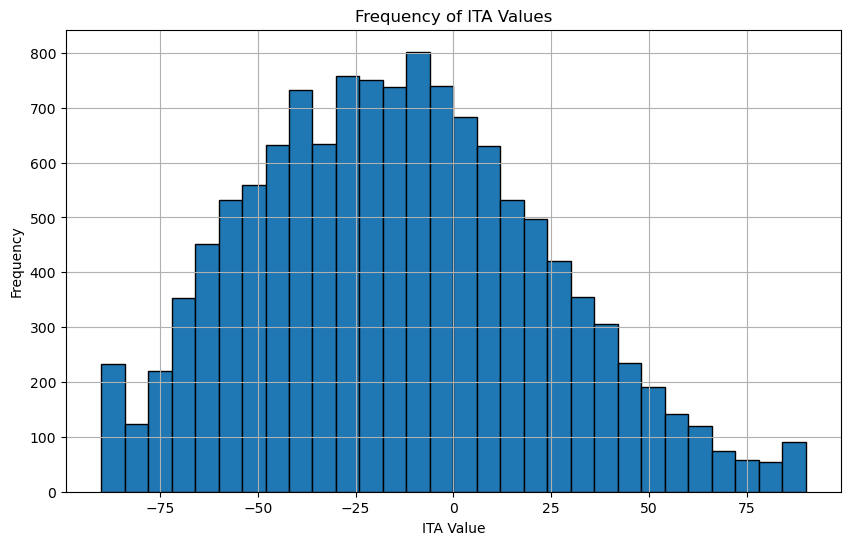

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = "/Users/myab/Documents/CategoricalvContinuous/multidimensional_skin_analysis/data/_snatched_combinedita_diff_results.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Extract the ITA values
ita_values = df['Original ITA']

# Create a histogram of ITA values
plt.figure(figsize=(10, 6))
plt.hist(ita_values, bins=30, edgecolor='black')
plt.xlabel('ITA Value')
plt.ylabel('Frequency')
plt.title('Frequency of ITA Values')
plt.grid(True)
plt.show()

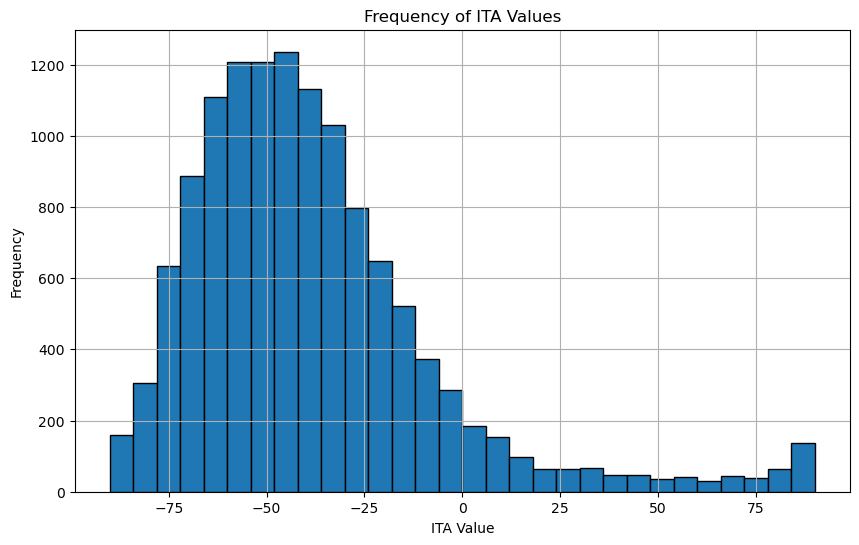

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = "/Users/myab/Documents/CategoricalvContinuous/multidimensional_skin_analysis/data/_snatched_combinedita_diff_results.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Extract the ITA values
ita_values = df['Filtered ITA']

# Create a histogram of ITA values
plt.figure(figsize=(10, 6))
plt.hist(ita_values, bins=30, edgecolor='black')
plt.xlabel('ITA Value')
plt.ylabel('Frequency')
plt.title('Frequency of ITA Values')
plt.grid(True)
plt.show()

# Save ITA Values to CSV file


15.jpg
/Users/myab/Documents/CategoricalvContinuous/multidimensional_skin_analysis/data/test/5_images_original/15.jpg


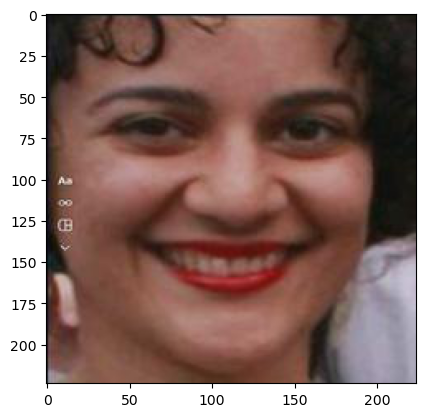

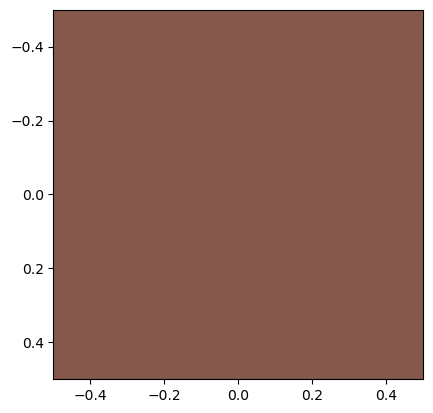

-28.805340702511177
11.jpg
/Users/myab/Documents/CategoricalvContinuous/multidimensional_skin_analysis/data/test/5_images_original/11.jpg


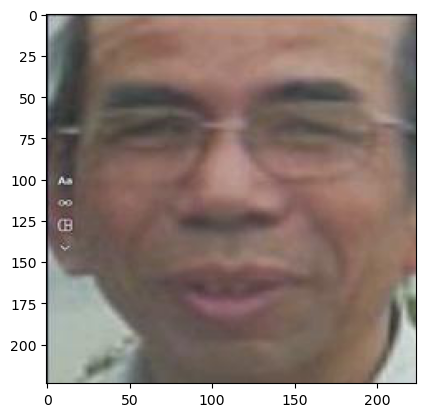

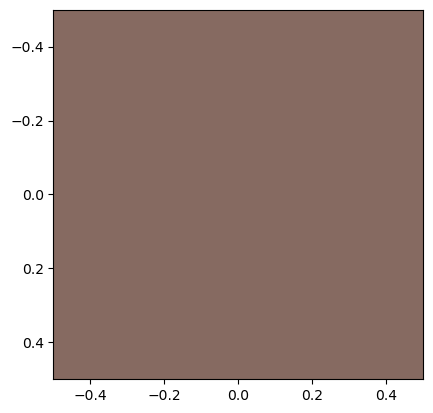

-14.63409882038197
5.jpg
/Users/myab/Documents/CategoricalvContinuous/multidimensional_skin_analysis/data/test/5_images_original/5.jpg


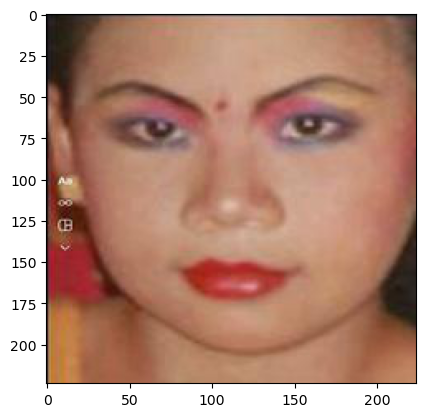

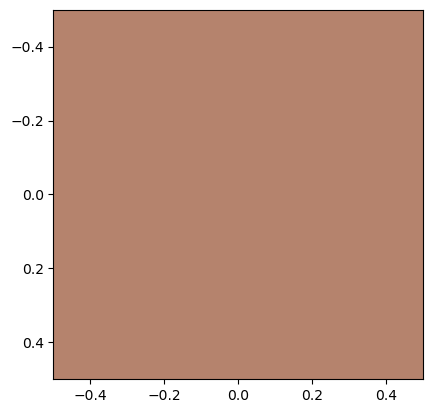

25.87684191433956
7.jpg
/Users/myab/Documents/CategoricalvContinuous/multidimensional_skin_analysis/data/test/5_images_original/7.jpg


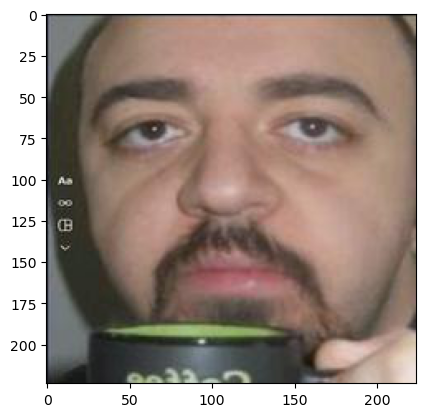

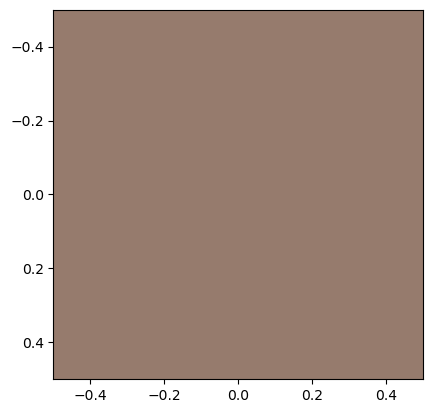

19.209533840721235
1.jpg
/Users/myab/Documents/CategoricalvContinuous/multidimensional_skin_analysis/data/test/5_images_original/1.jpg


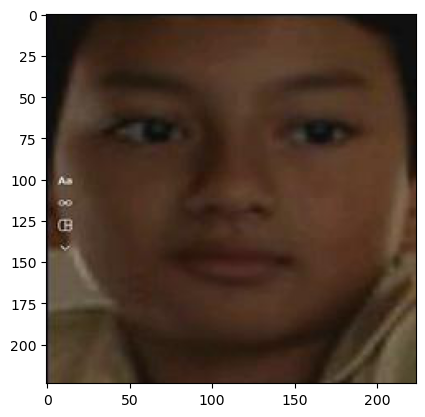

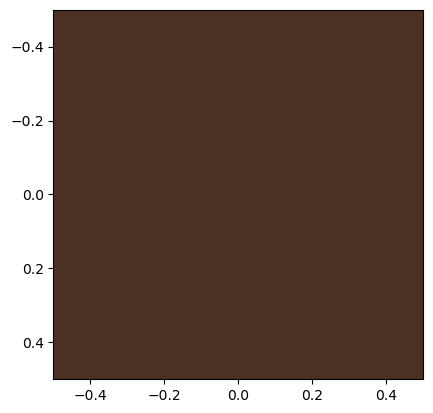

-61.542346867694974


In [25]:
img_dir = "/Users/myab/Documents/CategoricalvContinuous/multidimensional_skin_analysis/data/test/5_images_original"
dir_list = os.listdir(img_dir)
results_dir = "/Users/myab/Documents/CategoricalvContinuous/multidimensional_skin_analysis/data/"
# Create a CSV file to save the results
ita_csv_file = results_dir+'ita_results.csv'
with open(ita_csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image Name', 'ITA Value'])

    for img_name in dir_list:
        if img_name[-3:] != "jpg":
            continue
        print(img_name)
        img_path = os.path.join(img_dir, img_name)
        print(img_path)

        img = Image.open(img_path)
        mask1 = run_inference(img, image_processor, model)

        ita = get_ita(img, mask1)
        print(ita)

        # Write the results to the CSV file
        writer.writerow([img_name, ita])